# NVIDIA AI Bootcamp

- (**14:00~15:00**) [#1 - 深度學習概述+經典手寫辨識問題實作](#scrollTo=NoWp9Pn9QcQY)
  - 課程首先深入淺出，掌握基礎知識，讓參與者更快速見識到深度學習的魅力，
- (**15:00~17:00**) [#2 - 遷移式學習+颱風最大風速辨識實作+挑戰時間]((#scrollTo=znO_7Yd4QfIB)
  - 簡述遷移式學習，如何站在巨人的肩膀上，處理棘手的氣象命題。在課程結束前，學員應成功實作 颱風最大風速辨識的AI模型，並且看到實際成效。



# 1 - 深度學習概述+經典手寫辨識問題實作

## 深度學習概述 (30 mins)

- [課程投影片](https://docs.google.com/presentation/d/1YxbmwSbK4FctPsJC8ahqg_8H9HSw0zpImOhj78eSBYs/edit?usp=sharing) (僅提供部分內容)
- 系統性學習，推薦 [李宏毅 老師 Machine Learning 教學系列](https://www.youtube.com/playlist?list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49)

## 經典手寫辨識問題實作 (30 mins)

<p><img alt="Colaboratory logo" height="35px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

### <補充> 什麼是Colab ?

Colaboratory, 或者簡寫"Colab", 讓你可以透過網頁來撰寫、執行Python的程式：
- 不用複雜的系統設定
- 完全免費的GPUs可以使用
- 非常容易與其他開發者分享

不論您是 **學生**，**資料科學家** 或者 **人工智慧研究人員**, Colab 都可以讓你的工作變得更輕鬆. 請參考 [教學](https://colab.research.google.com/notebooks/welcome.ipynb)和[影片](https://www.youtube.com/watch?v=inN8seMm7UI) 來獲取更多資訊, 或者直接開始使用吧!

### 設定 GPU 開發環境

- 選單 Edit→Notebook Settings
- 從 Hardware Accelerator 下拉清單中選擇 GPU

#### 驗證 GPU 是否成功設定

In [ ]:
# 查看 NVIDIA GPU 狀況的指令
! nvidia-smi

[Keras](https://www.tensorflow.org/guide/keras/overview)實作入門影像分類問題:
- a - **建立**模型
- b - **訓練**模型
- c - **評估**模型

課程接下來會用到兩個套件，我們可以透過[pip](https://pip.pypa.io/en/stable/)安裝或驗證：
- [matplotlib](https://matplotlib.org/)
- [tensorflow_hub](https://www.tensorflow.org/hub)

In [ ]:
!pip install matplotlib tensorflow_hub

### 課程使用的Python套件與模組

- `TensorFlow`
  - 用於機器學習的端對端開放原始碼平台，由各式各樣的工具、程式庫和社群資源所組成，功能完善且具有彈性，可讓研究人員進一步發展機器學習的技術，並讓開發人員輕鬆打造及部署採用機器學習技術的應用程式。請參考：https://www.tensorflow.org/
- `TensorFlow Hub` 
  - 已訓練機器學習模型的存放區，這些模型可供微調，也可在任何地方部署。只要幾行程式碼，就能重複使用 BERT 和 Faster R-CNN 等經過訓練的模型。請參考：https://www.tensorflow.org/hub/tutorials
- `NumPy`
  - Python在進行科學運算時，一個非常基礎的Package，同時也是非常核心的library，提供非常高效能的多維陣列(multi-dimensional array)數學函式庫。
- `os`
  - 一個Python的系統程式設計的操作模組，可以處理檔案和目錄這些我們日常手動需要做的操作。
- `Math`
  - 是Python中常用的數學運算擴充套件。
- `glob`
  - 是python自己带的一个文件操作相关模块，用它可以查找符合自己目的的文件。
- `Datetime` 
  - 這個模組很好地封裝了Python 關於日期相關的處理

### 資料準備 與 視覺化

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools

手動下載 [MNIST資料集](http://yann.lecun.com/exdb/mnist/) (手寫數字0到9分類問題) ([來源](https://www.kaggle.com/vikramtiwari/mnist-numpy))

注意
- `GPU Server` 使用者：請**略過**下方指令，因資料集已預先下載好。
- `Colab` 使用者：請**執行**下列指令以下載資料集。


In [ ]:
# GPU Server 使用者：請略過下方指令，因資料集已預先下載好。
! curl https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz -o data/mnist.npz --create-dirs

In [ ]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

In [ ]:
# 載入資料
(x_train, y_train), (x_test, y_test) = load_data('data/mnist.npz')
# 資料正規化，降數值正規化到-1~1之間。
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f'train:\t X:{x_train.shape}, Y:{y_train.shape}')
print(f'test:\t X:{x_test.shape}, Y:{y_test.shape}')

視覺化第`idx`張訓練資料`x_train`和訓練標記`y_train`

In [ ]:
def plot_result(label, probs=None, num_class=10):
    """視覺化 影像資料 和 標記答案"""
    if probs is not None:
        pred = np.argmax(probs)
    else:
        pred = None
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    correct = 'Yes' if label==pred else 'No'
    plt.title(f'Label: {label}, Prediction: {pred}\nCorrect? {correct}')
    plt.imshow(data)

    if probs is not None:
        plt.subplot(1,2,2)
        plt.grid(True)
        plt.xticks(range(num_class))
        # plt.yticks(range(0., 1.1, 0.1))
        plt.ylim([0, 1])
        thisplot = plt.bar(range(10), probs, color="#777777")
        thisplot[pred].set_color('red')
        thisplot[label].set_color('blue')
        import matplotlib.patches as mpatches
        red_patch = mpatches.Patch(color='red', label='Prediction')
        blue_patch = mpatches.Patch(color='blue', label='Label')
        plt.legend(handles=[red_patch, blue_patch])

In [ ]:
idx = 100 ## 請嘗試看看0<=idx<=59999範圍內的數字
data = x_train[idx]
label = y_train[idx]
plot_result(label)

### a - **建立**模型

利用 `tf.keras.Sequential` 來建構深度學習網路架構。

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # 攤平 (28, 28) -> (28 x 28)
  tf.keras.layers.Dense(128, activation='relu'), # 全連接網路
  tf.keras.layers.Dense(10) # 全連接網路
])
model.build((None,28,28,1))
model.summary()

我們觀察上面參數量(Trainable Params)共使用了10萬多的權重(等等可以和CNN模型參數量比較)。

首先，用前面視覺化的資料當作範例。來觀察目前剛初始模型的預測能力。

每一筆資料經過模型後，都會輸出一個預測結果，機器學習領域的慣用語我們稱其為 [logits](https://developers.google.com/machine-learning/glossary#logits)。

In [ ]:
logits = model(data[None, :]).numpy()
print(logits)

透過 [tf.nn.softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax) 將 logits 轉換成 probabilities。

In [ ]:
probabilities = tf.nn.softmax(logits).numpy()[0]
print(probabilities)

機率最大的就是我們模型目前的預測結果。

In [ ]:
plot_result(label, probabilities)

透過 [SparseCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)(損失函數) 來計算loss。

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

目前這個模型還沒有經過訓練，所以一開始的預測結果會接近"隨機預測" (每個類別都猜10%的機率)，根據損失函數的公式，我們可以大概估算一開始的loss值接近 `-tf.log(1/10) ~= 2.3`。

In [ ]:
logits = model(x_train)
loss_fn(y_train, logits).numpy()

建立優化器[SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD)(optimizer)，損失函數[SparseCategoricalCrossEntropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)(loss)，評估函數[SparseCategoricalAccuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/SparseCategoricalAccuracy?hl=en)(metrics)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

### b - **訓練**模型

透過 `model.fit` 開始透過 Gradients Descent 來更新權重降低 loss 值。

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=5)

### c - **測試**模型

透過 `Model.evaluate` 來評估 **測試資料** 集的表現。

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

我們可以在訓練好的模型後接上`Softmax`，讓模型輸出"機率"值(介於0~1之間)。

In [ ]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [ ]:
probabilities = probability_model(data[None])[0]
plot_result(label, probabilities)

### 訓練更久

請嘗試看看訓練更久(舉例：epochs=20)，我們能否獲取更好/更壞的成績，並思考原因。

In [ ]:
epochs = 20 ## !!!!! 請編輯 !!!!!
assert epochs is not None

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # 攤平 (28, 28) -> (28 x 28)
  tf.keras.layers.Dense(128, activation='relu'), # 全連接網路
  tf.keras.layers.Dense(10) # 全連接網路
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

畫出訓練`training loss`與`validation loss`隨著時間變化的比較。

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'])
plt.show()

請將觀察到的想法記錄在下方[筆記區](#scrollTo=lY03MouoKs7G)，並與其他人討論原因。

#### 筆記區

(雙擊後可編輯，請記錄想法並與組員討論)

### 卷積類神經網路 CNN

如同上一部分3步驟，依序完成：
- a - **建立**模型
- b - **訓練**模型
- c - **評估**模型

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Reshape((28, 28, 1)),
  tf.keras.layers.Conv2D(filters=32, kernel_size=7, strides=2, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])
model.build((None,28,28,1))
model.summary()

NOTE: 可以觀察這次模型使用到的參數量(Trainable Params)，和全連接網路使用的參數量來比較。

開始訓練

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

目前能獲取約98.5%的正確率，和前一個實驗相比，請將觀察到的想法記錄在下方[筆記區](#scrollTo=j1rQd9qXL6vP)，並與其他人討論原因。

如果想獲取更多技巧和知識，請參考 [TensorFlow 教學](https://www.tensorflow.org/tutorials/).

#### 筆記區

(雙擊後可編輯，請記錄想法並與組員討論)

# #2 - 遷移式學習概述+颱風近中心最大風速辨識實作+挑戰時間

## 遷移式學習概述 (20 mins)

- [課程投影片](https://docs.google.com/presentation/d/1YxbmwSbK4FctPsJC8ahqg_8H9HSw0zpImOhj78eSBYs/edit?usp=sharing) (僅提供部分內容)
- 系統性學習，推薦 [李宏毅 老師 Machine Learning 教學系列](https://www.youtube.com/playlist?list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49)

## 颱風近中心最大風速辨識 實作 (50 mins)

- 從 **交通部氣象局衛星中心** 下載整理好的颱風衛星影像。

### 動機

西北太平洋區域每年有將近30個颱風生成，其中約有3至5個颱風將侵襲台灣，不僅是重要的水資源來源，也是主要的天然災害之一。颱風發源於溫暖且廣大的洋面上，在缺乏傳統觀測資料的遠洋區域，必須藉助衛星資料才能監測颱風的強度，並及早預估可能造成的危害。

由於颱風眼、眼牆及外圍雲系等結構與颱風本身的強度存在相關性，例如：越強的颱風，颱風眼越清晰、外圍雲系旋轉的狀況越明顯，因此我們得以透過衛星雲圖的分析颱風的結構，粗略估計颱風此時的強弱。

Dvorak颱風強度估計方法建構在上述概念之下，藉由可見光或紅外線雲圖的颱風雲形分布，評估颱風的T-number，再進一步估算颱風最大風速、中心氣壓等數據。但此方法為主觀研判，不僅需要累積大量的實務經驗，不同氣象人員可能計算出不同的數值。

隨著機器學習的發展，圖形辨識能力日趨成熟，我們期望藉助這個強大的工具，創造一個「客觀」颱風強度指標，讓氣象預報員在進行分析作業時，多一份可供參考之實用資訊。




...

### 資料準備 與 視覺化

- 注意
    - `GPU Server` 使用者：請**略過**下方指令，因資料集已預先下載好。
    - `Colab` 使用者：請**執行**下列指令以下載資料集。

In [ ]:
# GPU Server 使用者：請略過下方指令，因資料集已預先下載好。
! mkdir data
! FILEID="1yMY1eJ5xe73nTdX_Ie5EO9rkih084fPr" && FILENAME="data/Image_B13_v2.zip" && wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILEID" -O $FILENAME && rm -rf /tmp/cookies.txt
! unzip -oP nvidia_satellite -q data/Image_B13_v2.zip

- 透過 `ls` 查看資料夾結構

In [ ]:
!ls Image_B13/

In [ ]:
!ls Image_B13/test 

In [ ]:
!ls -d Image_B13/test/010/* | head -10 # head 顯示最前面幾個檔案

In [ ]:
import os
import tensorflow
from glob import glob

nrows = 14
ncols = 5
scale = 2
plt.figure(figsize=(nrows*scale, ncols*scale))
classses = sorted(glob('Image_B13/test/*'))
for i, class_path in enumerate(classses):
    class_name = os.path.basename(class_path)
    for j, img_path in enumerate(glob(os.path.join(class_path, '*'))[:ncols]):
        plt.subplot(ncols, nrows, j*nrows+i+1)
        img = tf.io.read_file(img_path)
        img = tf.image.decode_jpeg(img, channels=3)
        plt.axis('off')
        plt.title(class_name)
        plt.imshow(img)

根據上面的視覺化圖像，請與組員討論有哪些可能影響AI訓練的觀察。

#### 筆記區

(雙擊後可編輯，請記錄想法並與組員討論)

### a - **建立**模型

- 載入套件

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import math
from glob import glob
import datetime

# 設定颱風影像資料路浸
root_dir = 'Image_B13/'

## 設定超參數(Hyper-Parameters) ##
# 原圖影像為1000x1000這邊目標縮小為224x224，原因是使用的預訓練模型，所訓練的影像資料就是224x224，通常模型在處理相近大小的資料時可以表現更好。
IMG_RESIZE = 224
# Mini-batch訓練是deep learning非常慣用的技巧，這邊設定為每64張影像為一批次(batch)，訓練模型一次(step)。
BATCH_SIZE = 64

- 資料讀取&準備

In [ ]:
# 請參考：https://www.tensorflow.org/guide/data
# 請參考：https://www.tensorflow.org/tutorials/load_data/images
train_ds = tf.data.Dataset.list_files(os.path.join(root_dir, 'train/*/*'), shuffle=True)
test_ds = tf.data.Dataset.list_files(os.path.join(root_dir, 'test/*/*'), shuffle=True)

# 整理颱風類別
class_names = np.array(sorted([os.path.basename(item) for item in glob(os.path.join(root_dir,'train/*'))]))
num_class = len(class_names)
print(class_names)

# 統計資料數量
num_train = tf.data.experimental.cardinality(train_ds).numpy()
print(f'num_train: {num_train}')
num_test = tf.data.experimental.cardinality(test_ds).numpy()
print(f'num_test: {num_test}')
STEPS_PER_EPOCH = math.ceil(num_train/BATCH_SIZE)

########
# 定義 #
########

# Preprocessing: 資料前處理，影像資料需先整理成數值資料呈現。
@tf.function
def process_path(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    label = parts[-2] == class_names
    label = tf.math.argmax(label)
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_RESIZE, IMG_RESIZE])
    # Norm
    img = img / 128.0 -1
    return img, label

# Augmentation: 資料強化，增加資料多樣性可以幫助模型學得更通用(robustness)的特徵。
@tf.function
def aug(img, y):
    pad = IMG_RESIZE//8
    img = tf.image.resize_with_crop_or_pad(img, IMG_RESIZE + pad * 2, IMG_RESIZE + pad * 2)
    img = tf.image.random_crop(img, [IMG_RESIZE, IMG_RESIZE, 3])
    return img, y

########
# 初始 #
########

# Preprocessing
train_ds = train_ds.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
test_ds = test_ds.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()

# Augmentation + batching
train_ds = train_ds.map(aug, num_parallel_calls=tf.data.experimental.AUTOTUNE).shuffle(
        num_train).batch(BATCH_SIZE, drop_remainder=True).repeat().prefetch(
            buffer_size=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.batch(
    BATCH_SIZE, drop_remainder=False).prefetch(
        buffer_size=tf.data.experimental.AUTOTUNE)

建構深度學習分類模型

- 我們將使用預先訓練好的模型：[BiT-ResNet50](https://tfhub.dev/google/bit/m-r50x1/1)，遷移試學習通常會先固定預訓練好的模型`trainable=False`，避免模型訓練初期破換了以前學習的經驗。請參考 [Tensorflow Transfer Learning Tutorials](https://www.tensorflow.org/tutorials/images/transfer_learning)。

- 注意
    - `GPU Server` 使用者：請**執行**下方指令，因**預訓練模型**已預先下載好。

In [ ]:
model_url = "data/bit-m-r50x1"

- 注意
    - `Colab` 使用者：請使用下方路徑以自動下載**預訓練模型**。

In [ ]:
# GPU Server 使用者：請跳過下方指令，
model_url = "https://tfhub.dev/google/bit/m-r50x1/1"

In [ ]:
# trainable=False: 凍結模型!!
module = hub.KerasLayer(model_url, trainable=False)

In [ ]:
########
# 定義 #
########

# 建構我們的最終模型，在預先訓練好的模型，BiT-ResNet50之上，增添一層Dense Layer。
# 這是最常見的遷移試學習(Transfer Learning)，請參考：https://www.tensorflow.org/hub/tutorials
class MyBiTModel(tf.keras.Model):
  """BiT with a new head."""

  def __init__(self, module):
    super().__init__()
    self.head = tf.keras.layers.Dense(1, kernel_initializer='zeros')
    self.bit_model = module
  
  def call(self, images):
    bit_embedding = self.bit_model(images)
    return self.head(bit_embedding)

########
# 初始 #
########

# 初始化模型
model = MyBiTModel(module=module)
model(tf.keras.Input([224,224,3]))
model.summary()

定義Loss Function, Optimizer以及Callback Function

- Data Preprocessing, Model, Loss Function, Optimizer以及Callback Function等等都是深度學習最基本元素，請參考：https://www.tensorflow.org/tutorials/images/classification

In [ ]:
# Optimizer採用Adam，搭配Learning Rate=5e-4
# Loss Funcion採用MSE(MeanSquaredError)
lr = 5e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
loss_fn = tf.keras.losses.MeanSquaredError()

# TensorBoard 提供機器學習實驗所需的視覺化呈現和工具
# 請參考：https://www.tensorflow.org/tensorboard
log_dir = "./logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 請參考：https://www.tensorflow.org/tutorials/keras/save_and_load
checkpoint_filepath = f'{log_dir}/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_mae',
    mode='min',
    save_best_only=True)

# 模型編譯
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=[tf.keras.metrics.MeanAbsoluteError('mae'), tf.keras.metrics.RootMeanSquaredError('rmse')])

TensorBoard Notebook Extension

- 載入附加功能 且 開啟 TensorBoard，我們便可以透過TensorBoard來監控訓練狀況。

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir $log_dir --bind_all

設定自動更新，可以更方便觀察訓練狀況。

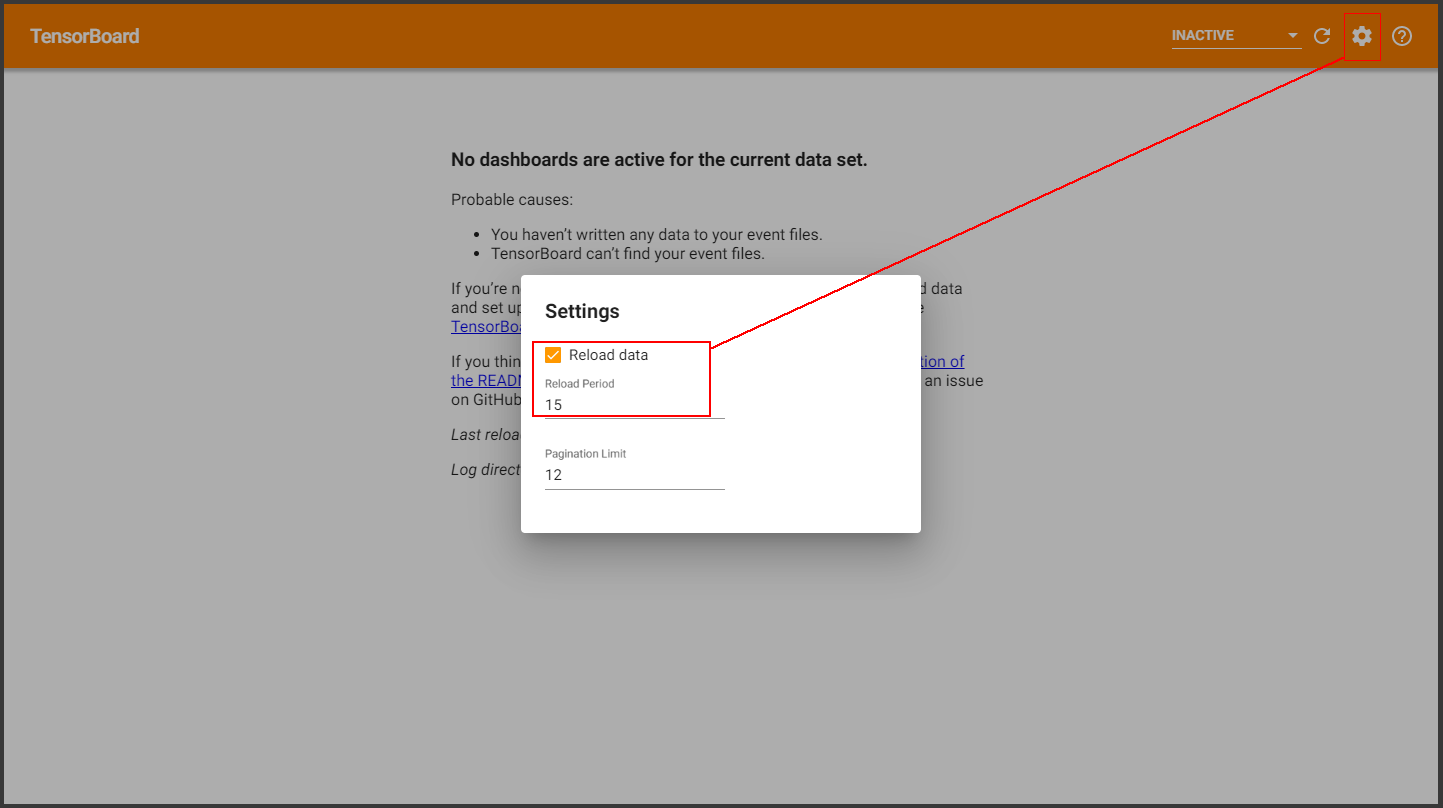

### b - **訓練**模型

In [ ]:
# 開始訓練，你可以同步觀察Tensorboard來監控訓練狀況。(可以點選Tensorboard介面右上的設定按鈕，調整相關設定)
epochs = 50
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    steps_per_epoch=STEPS_PER_EPOCH,
    callbacks=[model_checkpoint_callback, tensorboard_callback],
    epochs=epochs,  
    validation_data=test_ds
)

### c - **評估**模型

In [ ]:
model.evaluate(test_ds)

載入歷史最佳，重新評估

- 請參考：https://www.tensorflow.org/tutorials/keras/save_and_load

In [ ]:
model.load_weights(checkpoint_filepath)
model.evaluate(test_ds)

#### Plot Comfusion Matrix

In [ ]:
def plot_cm(model, test_ds):
    x_test_ds = test_ds.map(lambda x,y:x)
    y_test_ds = test_ds.map(lambda x,y:y)
        
    predictions = model.predict(x_test_ds)
    predictions = tf.math.round(predictions)
    predictions = tf.clip_by_value(predictions[...,0], 0, 13)
    cm = tf.math.confusion_matrix(tf.concat(list(y_test_ds), axis=0), predictions)
    cm = cm / (tf.math.reduce_sum(cm, axis=-1)[:, tf.newaxis])
    cm = np.round(cm.numpy(), 2)

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    threshold = tf.math.reduce_max(cm) / 2.
    for i, j in itertools.product(range(cm.shape[0]),
                                  range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion matrix")
    plt.colorbar()

plot_cm(model, test_ds)

#### 筆記區

(雙擊後可編輯，請記錄想法並與組員討論)

## 總結

課程結束後，您的AI模型應 **至少** 能達到以下效能：

- `mae`: 1.22
- `rmse`: 1.58

(附圖：訓練截圖)


image.png


#### 筆記區

(雙擊後可編輯，請記錄想法並與組員討論)

## 挑戰時間 (50 mins) 

- (30 mins) 自由挑戰，可參考不同任務的提示完成。
    - [a 遷移式學習+解除凍結後微調](#scrollTo=6cj63TAyzUFf)
    - [b 遷移式學習+資料擴增](#scrollTo=PmJ3t1uzzlT_) 
    - [c 嘗試用CPU訓練](#scrollTo=wyM4NTBBzloz)
    - [d 遷移式學習+不凍結](#scrollTo=L-6jxxZWzlaT)
    - [e 遷移式學習+不同學習率和批次數量](#scrollTo=5GMXFUZvzll1)
    - [f 重新訓練 (不使用遷移式學習)](#scrollTo=C9uVU0i-zlXF)
    - [g 混和精度訓練](#scrollTo=QH_69Se0zrzi)
- (20 mins) 各組成果分享

已協助將 `遷移式學習的程式` 重新整理如下，建議根據以下程式碼依據不同任務修改。

```bash
# GPU Server 使用者：請略過下方指令，因資料集已預先下載好。
! mkdir data
! FILEID="1yMY1eJ5xe73nTdX_Ie5EO9rkih084fPr" && FILENAME="data/Image_B13_v2.zip" && wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILEID" -O $FILENAME && rm -rf /tmp/cookies.txt
! unzip -oP nvidia_satellite -q data/Image_B13_v2.zip
```

```python
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import math
from glob import glob
import datetime
 
root_dir = 'Image_B13/'
IMG_RESIZE = 224
BATCH_SIZE = 64
 
train_ds = tf.data.Dataset.list_files(os.path.join(root_dir, 'train/*/*'), shuffle=True)
test_ds = tf.data.Dataset.list_files(os.path.join(root_dir, 'test/*/*'), shuffle=True)
 
class_names = np.array(sorted([os.path.basename(item) for item in glob(os.path.join(root_dir,'train/*'))]))
num_class = len(class_names)
 
num_train = tf.data.experimental.cardinality(train_ds).numpy()
num_test = tf.data.experimental.cardinality(test_ds).numpy()
STEPS_PER_EPOCH = math.ceil(num_train/BATCH_SIZE)
 
@tf.function
def process_path(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    label = parts[-2] == class_names
    label = tf.math.argmax(label)
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_RESIZE, IMG_RESIZE])
    # Norm
    img = img / 128.0 -1
    return img, label
 
@tf.function
def aug(img, y):
    pad = IMG_RESIZE//8
    img = tf.image.resize_with_crop_or_pad(img, IMG_RESIZE + pad * 2, IMG_RESIZE + pad * 2)
    img = tf.image.random_crop(img, [IMG_RESIZE, IMG_RESIZE, 3])
    return img, y
 
train_ds = train_ds.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
test_ds = test_ds.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
 
train_ds = train_ds.map(aug, num_parallel_calls=tf.data.experimental.AUTOTUNE).shuffle(
        num_train).batch(BATCH_SIZE, drop_remainder=True).repeat().prefetch(
            buffer_size=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.batch(
    BATCH_SIZE, drop_remainder=False).prefetch(
        buffer_size=tf.data.experimental.AUTOTUNE)
 
################## 請擇一 ##################
model_url = "https://tfhub.dev/google/bit/m-r50x1/1"
# model_url = "data/bit-m-r50x1" 
############################################
module = hub.KerasLayer(model_url, trainable=False)
 
class MyBiTModel(tf.keras.Model):
  """BiT with a new head."""
 
  def __init__(self, module):
    super().__init__()
    self.head = tf.keras.layers.Dense(1, kernel_initializer='zeros')
    self.bit_model = module
 
  def call(self, images):
    bit_embedding = self.bit_model(images)
    return self.head(bit_embedding)
 
model = MyBiTModel(module=module)
model(tf.keras.Input([224,224,3]))
 
lr = 5e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
loss_fn = tf.keras.losses.MeanSquaredError()
 
log_dir = "./logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
 
checkpoint_filepath = f'{log_dir}/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_mae',
    mode='min',
    save_best_only=True)
 
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=[tf.keras.metrics.MeanAbsoluteError('mae'), tf.keras.metrics.RootMeanSquaredError('rmse')])
 
epochs = 50
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    steps_per_epoch=STEPS_PER_EPOCH,
    callbacks=[model_checkpoint_callback, tensorboard_callback],
    epochs=epochs,  
    validation_data=test_ds
)
 
model.load_weights(checkpoint_filepath)
model.evaluate(test_ds)

plot_cm(model, test_ds)
```

### a 遷移式學習+解除凍結後微調

[參考](https://www.tensorflow.org/tutorials/images/transfer_learning)

**請接續課程內容，不需要重新初始模型**

(提示）

```python
# 查看全部網路權重學習狀態
for layer in model.layers:
    print(layer.trainable)

# 設定全部網路權重皆可學習
model.trainable = True
for layer in model.layers:
    print(layer.trainable)

# 因為現在全部網路權重皆可以學習，網路學習能力非常強，微調的learning rate不用太大
lr = 1e-6
```

### b 遷移式學習+資料擴增

**請重新初始模型**

(提示)

```python
@tf.function
def aug(img, y):
    pad = IMG_RESIZE//8
    img = tf.image.resize_with_crop_or_pad(img, IMG_RESIZE + pad * 2, IMG_RESIZE + pad * 2)
    img = tf.image.random_crop(img, [IMG_RESIZE, IMG_RESIZE, 3])
    img = tf.image.random_flip_left_right(img) # NEW!!!
    return img, y
```

### c 嘗試用CPU訓練 

**請重新初始模型**

(提示)

- 選單 Edit→Notebook Settings
- 從 Hardware Accelerator 下拉清單中選擇 `None`
- 因為環境重新設定，颱風氣象資料可能需要重新下載。

### d 遷移式學習+不凍結

**請重新初始模型**

(提示)

```python
# trainable=True: 不凍結!!
module = hub.KerasLayer(model_url, trainable=True)

# 查看全部網路權重學習狀態
for layer in model.layers:
    print(layer.trainable)
```

### e 遷移式學習+不同學習率和批次數量

**請重新初始模型**

(提示)

```python
...
optimizer = tf.keras.optimizers.Adam(learning_rate=???)
model.fit(..., batch_size=???, ...)
...
```

### f 重新訓練 (不使用遷移式學習)

**請重新初始模型**

[ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50)

(提示)

```python
module = tf.keras.applications.ResNet50(include_top=False, weights=None, pooling='avg')
model = MyBiTModel(module=module)
model(tf.keras.Input([224,224,3]))
model.summary()
```

### g 混和精度訓練 (承接 f)

(提示:)
- 請先完成 [任務f](#scrollTo=C9uVU0i-zlXF)
- 僅有包含 Tensor Cores 加速器的 GPU，才會有加速效果
- 目前大部分`hub.KerasLayer`的模型都不支援`fp16`半精度運算
- 使用混和精度同時意味著釋放出更多的GPU 記憶體空間，我們便可以使用2倍的`batch_size`和`learning_rate`以及0.5倍`epochs`數量，來加速我們的訓練速度。
- 通常遷移式學習的訓練負擔較小，不一定需要使用到混和經度，我們可以利用`挑戰 f`，模擬在不使用遷移式學習的情境下，觀察混和精度的加速效果！ 
- Reference: [Mixed Precision Guide](https://www.tensorflow.org/guide/mixed_precision)

```python
# Reminder: 2x batch size, 2x learning rate, 0.5x number of epochs.
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.mixed_precision import experimental as mixed_precision

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_policy(policy)

print('Compute dtype: %s' % policy.compute_dtype)
print('Variable dtype: %s' % policy.variable_dtype)
```

# Acknowledgement

> Credit to CWB Satellite Center and NVIDIA Taiwan SA Team, 

- 作者: 
  - Jay Chen, jaych@nvidia.com (NVIDIA)
  - Akey Chen, akeyinvestiga@gmail.com (CWB)
- 氣象局 X NVIDIA 深度學習讀書會 第一期
  - 2020-11-10 ~ 2021-02-02，2周1次，共7次
  - 第二期 還在計畫中，歡迎透過以下問卷留言交流。
- 請填寫意見反饋問卷，感謝指教。
  - [意見反饋問卷](https://forms.gle/hQhgm9wNvtdfpqZh8 )